In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

MAIN_PATH = '/Users/a80099708/Downloads/'
df = pd.read_csv(MAIN_PATH +'khs_data_20181205.csv')
original_df = df.copy()

# Have a grasp of how our data looks.
df.head()

,ClientNum,yyyymm,bankrupcytrate,finance_score,nonfin_score,finance_grade,nonfin_grade,final_credit_score,final_credit_grade,class_result
0,819975126,201712,100.0,20.76517,0.99946,19.0,20.0,0.0,23,1
1,400133939,201712,100.0,20.58430,14.68817,17.0,19.0,0.0,23,1
2,753036928,201712,100.0,28.96412,7.51639,17.0,20.0,0.0,22,1
3,822552163,201712,100.0,31.57935,16.66230,14.0,19.0,0.0,22,1
4,707775379,201712,100.0,18.33327,3.68292,19.0,20.0,0.0,23,1


In [3]:
df.describe()

,ClientNum,yyyymm,bankrupcytrate,finance_score,nonfin_score,finance_grade,nonfin_grade,final_credit_score,final_credit_grade,class_result
count,5.051600e+04,50516.0,50516.000000,50516.000000,50516.000000,49891.000000,49891.000000,50516.000000,50516.000000,50516.000000
mean,7.005465e+08,201712.0,2.913036,50.201195,55.936316,9.134754,7.755246,53.128512,8.387501,0.020251
std,1.341582e+08,0.0,5.373573,14.805311,14.091928,3.801960,3.236952,12.258762,3.324079,0.140859
min,4.000000e+08,201712.0,0.030000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,6.047907e+08,201712.0,0.840000,41.493325,48.346150,6.000000,6.000000,46.055625,6.000000,0.000000
50%,7.393906e+08,201712.0,1.420000,50.732170,57.216410,9.000000,7.000000,53.685815,8.000000,0.000000
75%,8.188123e+08,201712.0,2.280000,59.611787,65.021595,11.000000,9.000000,60.946142,10.000000,0.000000
max,8.750245e+08,201712.0,100.000000,98.000260,98.866710,20.000000,20.000000,100.000000,23.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50516 entries, 0 to 50515
Data columns (total 10 columns):
ClientNum             50516 non-null int64
yyyymm                50516 non-null int64
bankrupcytrate        50516 non-null float64
finance_score         50516 non-null float64
nonfin_score          50516 non-null float64
finance_grade         49891 non-null float64
nonfin_grade          49891 non-null float64
final_credit_score    50516 non-null float64
final_credit_grade    50516 non-null int64
class_result          50516 non-null int64
dtypes: float64(6), int64(4)
memory usage: 3.9 MB


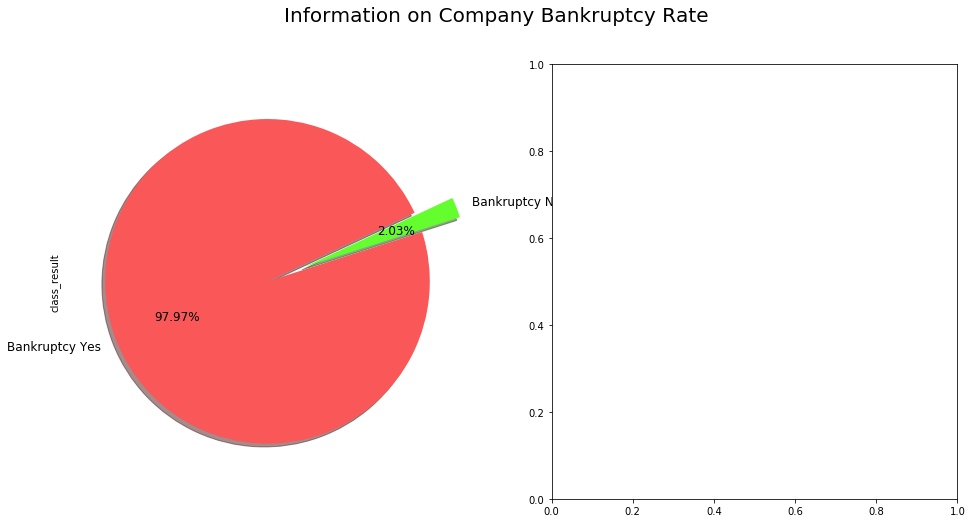

In [9]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Bankruptcy Yes", "Bankruptcy No"

plt.suptitle('Information on Company Bankruptcy Rate', fontsize=20)

df["class_result"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
# ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
#palette = ["#64FE2E", "#FA5858"]

#sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
#ax[1].set(ylabel="(%)")
#ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

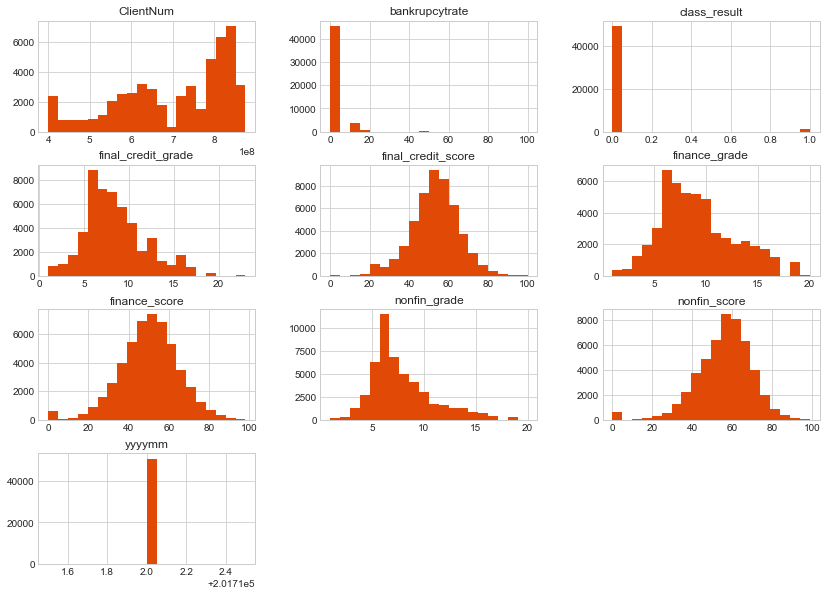

In [10]:

# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [12]:
# 의미 없는 변수인 client number와 결산년월(yyyymm)은 삭제한다

df.drop(['ClientNum', 'yyyymm'], axis=1, inplace=True)


In [13]:
df.head()

,bankrupcytrate,finance_score,nonfin_score,finance_grade,nonfin_grade,final_credit_score,final_credit_grade,class_result
0,100.0,20.76517,0.99946,19.0,20.0,0.0,23,1
1,100.0,20.58430,14.68817,17.0,19.0,0.0,23,1
2,100.0,28.96412,7.51639,17.0,20.0,0.0,22,1
3,100.0,31.57935,16.66230,14.0,19.0,0.0,22,1
4,100.0,18.33327,3.68292,19.0,20.0,0.0,23,1


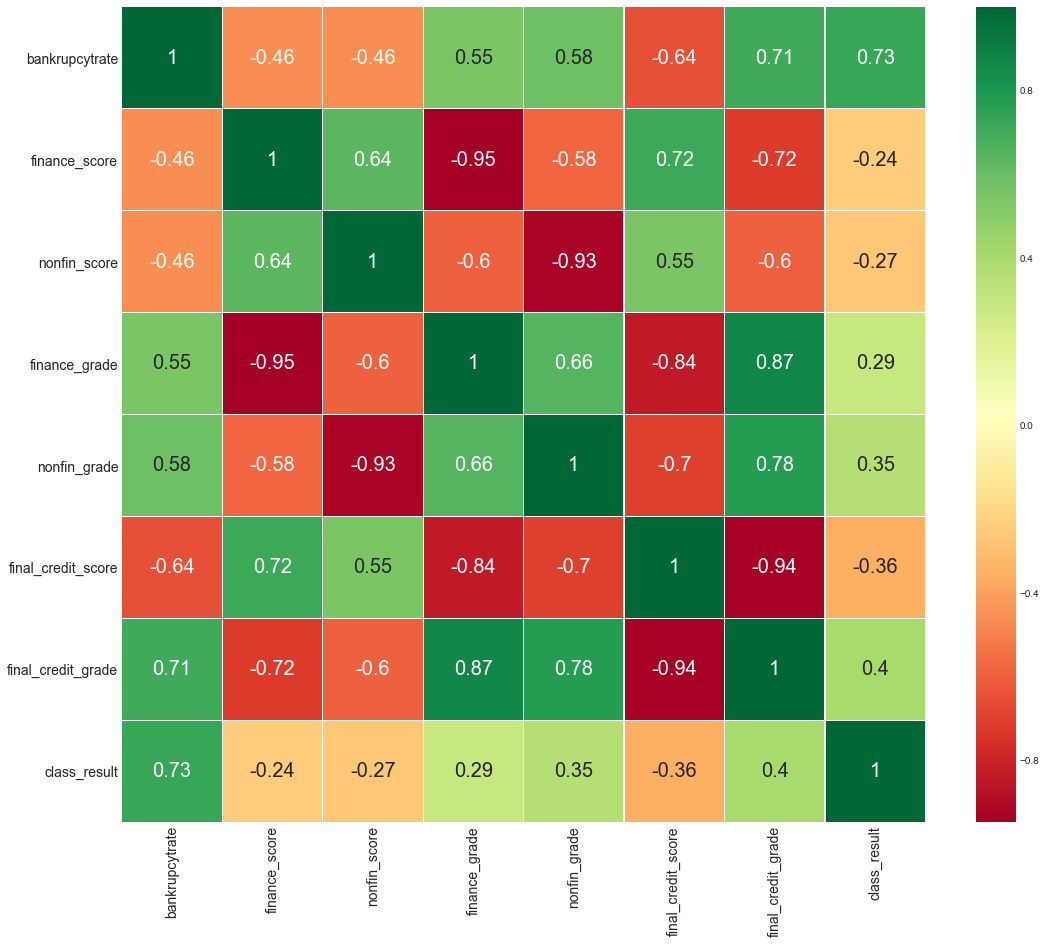

In [14]:

# 전체 변수 correlation 분석
corr = df.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler

nc = MinMaxScaler()

## values.reshape 은 메트릭스의 모양을 바꿔준다.
sv_bankrupcytrate = nc.fit_transform(df['bankrupcytrate'].values.reshape(0,1))
sv_finance_score = nc.fit_transform(df['finance_score'].values.reshape(0,1))
sv_nonfin_score = nc.fit_transform(df['nonfin_score'].values.reshape(0,1))
sv_finance_grade = nc.fit_transform(df['finance_grade'].values.reshape(0,1))
sv_nonfin_grade = nc.fit_transform(df['nonfin_grade'].values.reshape(0,1))
sv_final_credit_score = nc.fit_transform(df['final_credit_score'].values.reshape(0,1))
sv_final_credit_grade = nc.fit_transform(df['final_credit_grade'].values.reshape(0,1))

ValueError: cannot reshape array of size 50516 into shape (0,1)